# Рекомендация тарифов 📲

В нашем распоряжении данные о поведении клиентов одного из сотовых операторов. Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Ее точность в предсказаниях должна составлять минимум `75%`. Предобработка данных не понадобится, так как известно, что данные уже были предварительно обработаны.

**Цели исследования**

1. Исследовать эффективность и результативность нескольких моделей машинного обучения из библиотеки `sklearn`
2. Оценить влияние `K-fold кросс-валидации` в совокупности с подбором гиперпараметров моделей с помощью `GridSearchCV` на итоговые значения метрик
3. Получить модель с точностью в предсказаниях не менее `75%`

**Ход исследования:**

[Скачать исходные данные](https://code.s3.yandex.net/datasets/users_behavior.csv)

О качестве исходных данных известно, что они уже были предобработаны, но дополнительно проведем оценку этого.

Далее выполним разбивку данных на три составляющих: тренировочный набор, валидационный набор и тестовый набор. Соотношение возьмем следующее: **3\:1\:1**, соответственно.

Рассмотрим несколько популярных моделей, которые потенциально могут показать хорошие значения метрик. Сравним их между собой, отберем модели с наиболее удачными наборами гиперпараметров из каждой категории для послдующего их сравнения.

Проверим их эффективность на тестовых данных, опишем, как поменялись полученные в ходе валидации моделей значения метрики.

Проверим наилучшую модель на адекватность путем сравнения метрики `Accuracy` нашей модели с той, что псевдослучайно классифицирует объекты в данных.

**Резюмируя вышеописанное**, исследование пройдет в **6 этапов**:

1. Обзор данных
2. Разделение данных на наборы
3. Постровение моделей, их валидация, выбор самой лучшей
4. Проверка лучших моделей в каждой категории на тестовых данных
5. Проверка модели на адекватность
6. Подведение итогов

<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Обзор-данных-🥸" data-toc-modified-id="Шаг-1.-Обзор-данных-🥸-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Обзор данных 🥸</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Корреляция-признаков.-Мультиколлинеарные-признаки" data-toc-modified-id="Корреляция-признаков.-Мультиколлинеарные-признаки-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Корреляция признаков. Мультиколлинеарные признаки</a></span></li><li><span><a href="#Сбалансированность-классов-в-целевом-признаке" data-toc-modified-id="Сбалансированность-классов-в-целевом-признаке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Сбалансированность классов в целевом признаке</a></span></li></ul></li><li><span><a href="#Шаг-2.-Разбиение-данных-✂️" data-toc-modified-id="Шаг-2.-Разбиение-данных-✂️-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Разбиение данных ✂️</a></span></li><li><span><a href="#Выбор-модели-🤖" data-toc-modified-id="Выбор-модели-🤖-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выбор модели 🤖</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span><ul class="toc-item"><li><span><a href="#Кросс-валидация-и-настройка-гиперпараметров" data-toc-modified-id="Кросс-валидация-и-настройка-гиперпараметров-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Кросс-валидация и настройка гиперпараметров</a></span></li><li><span><a href="#Валидация-модели" data-toc-modified-id="Валидация-модели-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Валидация модели</a></span></li></ul></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span><ul class="toc-item"><li><span><a href="#Кросс-валидация-и-настройка-гиперпараметров" data-toc-modified-id="Кросс-валидация-и-настройка-гиперпараметров-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Кросс-валидация и настройка гиперпараметров</a></span></li><li><span><a href="#Валидация-модели" data-toc-modified-id="Валидация-модели-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Валидация модели</a></span></li></ul></li><li><span><a href="#Итого" data-toc-modified-id="Итого-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Проверка-моделей-на-тестовой-выборке-🕵🏼" data-toc-modified-id="Проверка-моделей-на-тестовой-выборке-🕵🏼-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка моделей на тестовой выборке 🕵🏼</a></span><ul class="toc-item"><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-адекватность-🧐" data-toc-modified-id="Проверка-модели-на-адекватность-🧐-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка модели на адекватность 🧐</a></span><ul class="toc-item"><li><span><a href="#DummyClassifier" data-toc-modified-id="DummyClassifier-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span><code>DummyClassifier</code></a></span></li></ul></li><li><span><a href="#Общий-вывод-👀" data-toc-modified-id="Общий-вывод-👀-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод 👀</a></span><ul class="toc-item"><li><span><a href="#Краткая-сводка-по-выполненным-задачам" data-toc-modified-id="Краткая-сводка-по-выполненным-задачам-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Краткая сводка по выполненным задачам</a></span><ul class="toc-item"><li><span><a href="#Шаг-1.-Обзор-данных" data-toc-modified-id="Шаг-1.-Обзор-данных-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Шаг 1. Обзор данных</a></span></li><li><span><a href="#Шаг-2.-Разбиение-данных" data-toc-modified-id="Шаг-2.-Разбиение-данных-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Шаг 2. Разбиение данных</a></span></li><li><span><a href="#Шаг-3.-Выбор-модели" data-toc-modified-id="Шаг-3.-Выбор-модели-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Шаг 3. Выбор модели</a></span></li><li><span><a href="#Шаг-4.-Проверка-моделей-на-тестовой-выборке" data-toc-modified-id="Шаг-4.-Проверка-моделей-на-тестовой-выборке-6.1.4"><span class="toc-item-num">6.1.4&nbsp;&nbsp;</span>Шаг 4. Проверка моделей на тестовой выборке</a></span></li><li><span><a href="#Шаг-5.-Проверка-модели-на-адекватность" data-toc-modified-id="Шаг-5.-Проверка-модели-на-адекватность-6.1.5"><span class="toc-item-num">6.1.5&nbsp;&nbsp;</span>Шаг 5. Проверка модели на адекватность</a></span></li></ul></li><li><span><a href="#Как-использовать-полученный-результат-в-бизнесе?-Как-на-этих-прогнозах-сделать-деньги?" data-toc-modified-id="Как-использовать-полученный-результат-в-бизнесе?-Как-на-этих-прогнозах-сделать-деньги?-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Как использовать полученный результат в бизнесе? Как на этих прогнозах сделать деньги?</a></span></li><li><span><a href="#Что-могло-привести-к-получению-неполноценных-результатов?" data-toc-modified-id="Что-могло-привести-к-получению-неполноценных-результатов?-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Что могло привести к получению неполноценных результатов?</a></span></li></ul></li></ul></div>

## Шаг 1. Обзор данных 🥸

Вместе с исходными данными шла **документация к каждому из столбцов**.
* Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц:
    * `сalls` — количество звонков,
    * `minutes` — суммарная длительность звонков в минутах,
    * `messages` — количество sms-сообщений,
    * `mb_used` — израсходованный интернет-трафик в Мб,
    * `is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from IPython.display import display
import urllib
import warnings
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings("ignore")

In [3]:
try:
    data = pd.read_csv(
        'https://code.s3.yandex.net/datasets/users_behavior.csv')
    print('✅ Данные загружены с внешнего ресурса и успешно прочитаны')
    display(data.head(10))
except urllib.request.URLError:  # Если отстутствует доступ к внешнему ресурсу с данными
    while True:
        data_path = input('Введите абсолютный путь к датасету:\n')
        try:
            df = pd.read_csv(data_path)
            print('✅ Исходные данные успешно прочитаны по указанному пути')
            display(df.head(10))

            break

        except FileNotFoundError:  # Путь, указанный пользователем, неверный
            raise Exception(f'❌Указан неверный путь к файлу: {data_path}')

✅ Данные загружены с внешнего ресурса и успешно прочитаны


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


Данные прочитаны.

Убедимся, что пропусков в исходных данных таки нет.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Все хорошо.

Построим гистограммы по всем столбцам

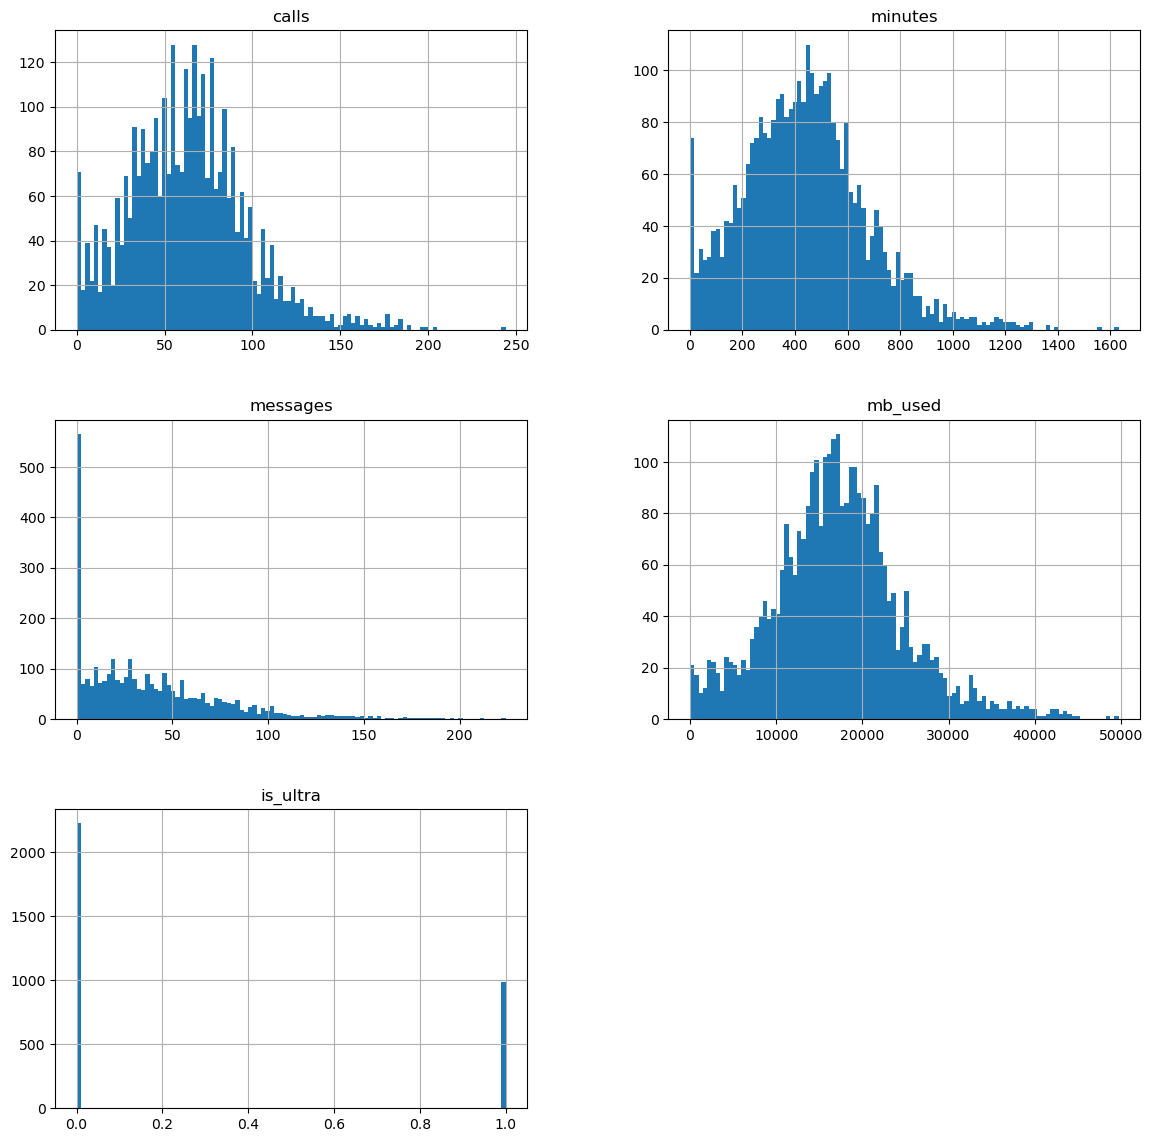

In [5]:
data.hist(figsize=(14, 14), bins=100)
plt.show()

Чего-то аномального на графиках не видно. Дополнительно убедимся в том, что нет явных дубликатов и изменим тип данных в столбцах `calls` и `messages` на `int`

In [6]:
data.duplicated().sum()

0

Здесь все хорошо, поэтому поменяем тип данных

In [7]:
data.loc[:, ['calls', 'messages']] = data.loc[:, ['calls', 'messages']].astype(int)
data.dtypes

calls         int64
minutes     float64
messages      int64
mb_used     float64
is_ultra      int64
dtype: object

### Корреляция признаков. Мультиколлинеарные признаки

Взглянем на **корреляцию признаков**, проверим **наличие или отсутствие мультиколлинеарных признаков**, которые могут исказить результат.

Для этого построим корреляционную матрицу

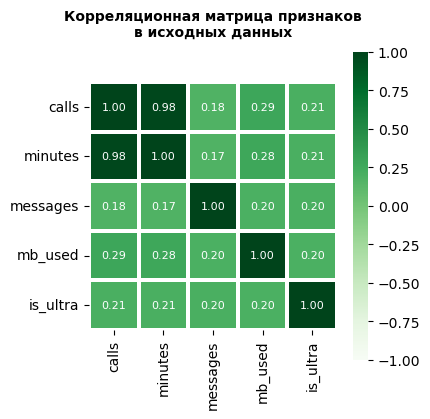

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))
corrs = data.corr()


sns.heatmap(
    corrs,
    ax=ax,
    cmap='Greens',
    vmin=-1.0, vmax=1.0,
    square=True,  
    annot=True, fmt=".2f",
    annot_kws={'fontsize': 8},
    linewidth=1.5
)


plt.title(
    'Корреляционная матрица признаков\nв исходных данных', 
    fontsize=10, 
    fontweight='bold', 
    y=1.15
)

plt.show()

Минуты и кол-во звонков сильно связаны, что свидетельствует о наличии мультиколлинеарности, от которой, по-хорошему, стоит избавляться, но здесь есть следующие детали:

- Первый момент: мультиколлинеарность проблема линейных моделей - могут переобучаться.... теоретически. Но в логистической, и в линейной регрессиях реализована регуляризация, которая решает проблему мультиколлинеарности признаков. "Деревянные" модели (RF, DT) устойчивы к мультиколлинеарности, а кластеризация тоже почти не зависит от линейных зависимостей. Получается, избавляться от мультиколлинеарности, чтобы не переобучаться не обязательно )
    
    
- Второй момент: интерпретируемость линейной модели (мы по коэффициентам судим о том, как признаки влияют на целевой признак), тут мультиколлинеарность надо убирать.


Получается, что в нашем случае убирать мультиколлинеарность имеет смысл только в том случае, если мы захотим посмотреть как конкретно признаки влияют на целевой признак.

В остальном все хорошо.

### Сбалансированность классов в целевом признаке

Теперь взглянем на **сбалансированность классов в целевом признаке**.

Для начала определим его и оценим задачу, которую предстоит решить.

Целевой признак - `is_ultra`. Значения в нем *бинарны*. Из этого следует, что требуется решить задачу **бинарной классификации**. Поэтому классов всего два: абонент пользуется улучшенным тарифом или нет.

**Почему стоит оценить баланс классов?**

Перед использованием алгоритма машинного обучения важно избежать дисбаланса классов, потому что наша конечная цель – обучить модель машинного обучения, которая хорошо обобщается для всех возможных классов, предполагая, что у нас есть двоичный набор данных с равным количеством выборок.

Также оценка сбалансированности классов в целевом признаке поможет не только оценить достоверность исходных данных, но также сразу понять, какую модель в дальнейшем считать "адекватной" (но об этом чуть позже).

In [9]:
print('Доля класса 0 составляет: {:.2%}\n'.format(len(data.query('is_ultra == 0')) / len(data)))
print('Доля класса 1 составляет: {:.2%}'.format(len(data.query('is_ultra == 1')) / len(data)))

Доля класса 0 составляет: 69.35%

Доля класса 1 составляет: 30.65%


Классы в целевом признаке не очень-то и сбалансированны.

Сразу можно сказать, что простейшая модель типа "угадайка" (😃) с легкостью может показать результат как минимум в `69.35%` правильных ответов. Собственно, от этой границы и будем отталкиваться, оценивая адекватность нашей модели далее.

В этом исследовании затрагивать способы перебалансировки классов не будем и внедрим их в следующих проектах.

## Шаг 2. Разбиение данных ✂️

Данные поделим на три выборки в соотношении **3\:1\:1** : тренировочная, валидационная и тестовая.

Выполним разбиение данных на три выборки

In [10]:
train, validate, test = np.split(
    data.sample(
        frac=1,
        random_state=2786
    ),
    [int(.6*len(data)), int(.8*len(data))]
)

X_train = train.drop(columns=['is_ultra'])
Y_train = train['is_ultra']

X_valid = validate.drop(columns=['is_ultra'])
Y_valid = validate['is_ultra']

X_test = test.drop(columns=['is_ultra'])
Y_test = test['is_ultra']

Убедимся, что наборы данных составлены верно

In [11]:
print(
    f'Кол-во объектов в X_train: {len(X_train)}\n'
    f'Кол-во объектов в Y_train: {len(Y_train)}'
    f'\n\n'
    f'Кол-во объектов в X_valid: {len(X_valid)}\n'
    f'Кол-во объектов в Y_valid: {len(Y_valid)}'
    f'\n\n'
    f'Кол-во объектов в X_test: {len(X_test)}\n'
    f'Кол-во объектов в Y_test: {len(Y_test)}'
)

Кол-во объектов в X_train: 1928
Кол-во объектов в Y_train: 1928

Кол-во объектов в X_valid: 643
Кол-во объектов в Y_valid: 643

Кол-во объектов в X_test: 643
Кол-во объектов в Y_test: 643


In [12]:
datasets = [
    {'Тренировочные признаки (X_train)': X_train,
     'Цель тренировки (Y_train)': Y_train},
    {'Валидационные признаки (X_valid)': X_valid,
     'Цель валидации (Y_valid)': Y_valid},
    {'Тестировочные признаки (X_test)': X_test, 'Цель теста (Y_test)': Y_test}
]

for dataset_info in datasets:
    print(list(dataset_info.keys())[0])
    display(list(dataset_info.values())[0].head())
    print('\n')
    print(list(dataset_info.keys())[1])
    display(list(dataset_info.values())[1].head())
    print('\n\n\n')

Тренировочные признаки (X_train)


,calls,minutes,messages,mb_used
3150,93,649.53,10,17590.85
1381,63,403.32,65,16784.02
853,104,704.71,30,43304.53
2223,28,222.21,30,22986.30
1728,43,266.10,22,6676.01




Цель тренировки (Y_train)


3150    0
1381    0
853     1
2223    0
1728    1
Name: is_ultra, dtype: int64





Валидационные признаки (X_valid)


,calls,minutes,messages,mb_used
1887,48,316.55,50,19504.31
2128,50,291.52,68,12643.05
1257,68,543.50,2,11372.29
1295,105,763.27,10,33233.63
2825,83,588.95,68,15433.18




Цель валидации (Y_valid)


1887    0
2128    0
1257    0
1295    1
2825    0
Name: is_ultra, dtype: int64





Тестировочные признаки (X_test)


,calls,minutes,messages,mb_used
1652,112,717.85,128,27194.86
1169,55,298.60,6,14288.14
687,62,371.18,7,18076.46
2566,41,289.83,15,22151.73
2035,59,420.57,70,25990.33




Цель теста (Y_test)


1652    1
1169    0
687     0
2566    0
2035    0
Name: is_ultra, dtype: int64

Все выполненно корректно. Данные успешно разбиты на три выборки: тренировочная, валидационная и тестовая.

Для удобства работы в дальнейшем сохраним каждый датасет отдельно локально.

Назовем из соответственно: 
- Тренировочный набор: `f_train.csv` и `t_train.csv`;
- Валидационный набор: `f_valid.csv` и `t_valid.csv`;
- Тестовый набор: `f_test.csv` и `t_test.csv`.

In [13]:
X_train.to_csv('f_train.csv', index=False)
Y_train.to_csv('t_train.csv', index=False)

X_valid.to_csv('f_valid.csv', index=False)
Y_valid.to_csv('t_valid.csv', index=False)

X_test.to_csv('f_test.csv', index=False)
Y_test.to_csv('t_test.csv', index=False)

Данные успешно поделены в соотношении 3\:1\:1 и готовы для использования в процессе обучения моделей

## Выбор модели 🤖

Как было установлено ранее, предстоит решить задачу **бинарной классификации**.

Существует несколько классфикационных моделей, каждую из которых стоит рассмотреть как потенциального кандидата на роль наиболее подходящей для нашей ситуации:
- `LogisticRegression`
- `RandomForestRegressor`

Для сравнения метрик (о каких именно - далее), отражающих эффективность каждой из моделей, требуется сначала построить сами модели. В свою очередь, для этого нужно подобрать наиболее подходящие гиперпараметры для каждой из них, чтобы сузить круг поиска и выбирать из перечня лучших.

Подбор наиболее подходящих гиперпараметров осуществим при помощи `GridSearchCV` из модуля `sklearn.model_selection`. Этот инструмент позволит значительно снизить затраты времени на проведение сравнения характреристик каждой из моделей.

Для повышения качества обучения модели также будем использовать **K-fold кросс-валидацию**, которая дополнительно разобьет тестовую выборку на несколько частей (например, поделит весь набор на 5 частей и 4 из них - тренировочные, 1 - тестовая) некоторое количество раз и поочередно обучит на их основе модель, после чего мы сможем понять, в каком или в каких случаях модель обучалась лучше всего. Использование этой техники при обучении модели особенно актуально в нашем случае, поскольку объем данных невелик.

Пайплайн поиска наиболее эффективного решения выглядит следующим образом:

![Пайплайн выбора модели](https://i.ibb.co/BGr9ZZ0/Business-Process-Business-Process-1.png)

Для каждого из типов моделей будет выполнена K-fold кросс-валидация, настройка гиперпараметров при помощи `GridSearchCV` и определение лучшего их набора для последующего сравнения с аналогичными моделями в других классах.

Сравнение моделей будем производить исходя из получаемых значений следующих метрик:
- `Accuracy` Доля правильных ответов. Пожалуй, основная характеристика модели.
- `Precision` Можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными
- `Recall` Показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм
- `F1 score` Измеряет, насколько точно модель классифицирует данные, и насколько полно она может идентифицировать все классы. `F1-мера` объединяет точность и полноту в одно число, которое показывает, насколько хорошо модель работает в целом.

Прочитаем тренировочные данные

In [14]:
X_train = pd.read_csv('f_train.csv')
Y_train = pd.read_csv('t_train.csv')

### Логистическая регрессия

#### Кросс-валидация и настройка гиперпараметров

In [15]:
logr = LogisticRegression(random_state=42)

scores = cross_val_score(logr, X_train, Y_train.values.ravel(), cv=5)

scores

array([0.74870466, 0.74093264, 0.69430052, 0.72987013, 0.69350649])

`GridSearchCV` использует сетку параметров, внутри которой перебирает все возможные комбинации параметров.

Составим эту сетку путем создания словаря `hyperparams`, в котором в виде ключей будут имена гиперпараметров, а в виде ключей списки с их различными значениями. 

В качестве проверяемых гиперпараметров выделим следующие:
- `C`
    Этот параметр задает обратную силу регуляризации. В других словах, параметр `C` определяет, насколько "жестко" мы хотим, чтобы модель подгоняла данные. Если мы установим маленькое значение `C`, то модель будет сильно регуляризована и будет склонна обобщаться лучше на новые данные. Наоборот, большое значение `C` позволяет модели более точно подгонять данные, что может привести к переобучению на тренировочных данных.
- `penalty` 
    Этот параметр задает тип регуляризации, которая будет использоваться для уменьшения переобучения модели. Возможными значениями являются `l1`, `l2`, `elasticnet` и `None`.
- `solver`
    Этот параметр задает алгоритм, который будет использоваться для решения оптимизационной задачи в логистической регрессии. В официальной документации для небольшого объема данных рекомендуют использовать `liblinear` - как раз и убедимся, действительно ли он так хорош.

Далее передадим соответствующие агрументы: модель, словарь гиперпараметров и значение для выбора стратегии кросс-валидации (при значении 3, к примеру, данные будут поделены на три части). Совершим подгонку, используя метод `fit()` 

In [16]:
hyperparams = {
    'C': [0.01, 0.1, 0.3, 0.5],
    'penalty': ['l1', 'l2', None, None],
    'solver': ['lbfgs', 'liblinear', None, None]
}

logr_cross_val = GridSearchCV(logr, hyperparams, cv=5)

logr_cross_val.fit(X_train, Y_train.values.ravel())

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 0.3, 0.5],
                         'penalty': ['l1', 'l2', None, None],
                         'solver': ['lbfgs', 'liblinear', None, None]})

Сетка параметров составлена. Теперь напишем функцию `optimal_params`, которая вывыдет значение средней точности предсказаний модели при кросс-валидации для каждого из наборов параметров и сами параметры. По итогу отберем самую лучшую модель.

Также дополнительно вручную отберем еще пару моделей, чтобы дальше их тоже сравнить.

In [17]:
def optimal_params(grid):
    print(f'Оптимальные гиперпараметры: {grid.best_params_}\n')

    means = grid.cv_results_['mean_test_score']
    stds = grid.cv_results_['std_test_score']

    for mean, std, params in zip(means, stds, grid.cv_results_['params']):
        print(
            f'Средний рейтинг: {np.round(mean, 3)}\n'
            f'Стандартное отклонение: {np.round(std, 3)}\n'
            f'Проверяемые параметры: {params}\n\n'
        )


optimal_params(logr_cross_val)

Оптимальные гиперпараметры: {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}

Средний рейтинг: nan
Стандартное отклонение: nan
Проверяемые параметры: {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}


Средний рейтинг: 0.695
Стандартное отклонение: 0.003
Проверяемые параметры: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


Средний рейтинг: nan
Стандартное отклонение: nan
Проверяемые параметры: {'C': 0.01, 'penalty': 'l1', 'solver': None}


Средний рейтинг: nan
Стандартное отклонение: nan
Проверяемые параметры: {'C': 0.01, 'penalty': 'l1', 'solver': None}


Средний рейтинг: 0.721
Стандартное отклонение: 0.023
Проверяемые параметры: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


Средний рейтинг: 0.697
Стандартное отклонение: 0.005
Проверяемые параметры: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


Средний рейтинг: nan
Стандартное отклонение: nan
Проверяемые параметры: {'C': 0.01, 'penalty': 'l2', 'solver': None}


Средний рейтинг: nan
Стандартное отклонение: nan
Провер

По итогам перебора отобраны три лучшие модели со следющими гиперпараметрами:
- `C` = 0.5, `penalty` = 'l1', `solver` = 'liblinear'
- `C` = 0.3, `penalty` = 'l1', `solver` = 'liblinear'
- `C` = 0.1, `penalty` = 'l1', `solver` = 'liblinear'

Собственно, вот и подтвердилось то, что алгоритм решения `liblinear` в нашем конкретном случае лидирует.

Различаются только параметры `C`, но это в целом понятно: чем больше `C`, тем лучше результат показывает модель на тренировочных данных. Главное - не перестараться, ибо дальше модель начнет переобучаться, а результаты предсказаний падать.

#### Валидация модели

In [18]:
logr1 = LogisticRegression(
    solver='liblinear', penalty='l1', C=0.5, random_state=123)
logr1.fit(X_train, Y_train)

logr2 = LogisticRegression(
    solver='liblinear', penalty='l1', C=0.3, random_state=123)
logr2.fit(X_train, Y_train)

logr3 = LogisticRegression(
    solver='liblinear', penalty='l1', C=0.1, random_state=123)
logr3.fit(X_train, Y_train)

LogisticRegression(C=0.1, penalty='l1', random_state=123, solver='liblinear')

In [19]:
X_valid = pd.read_csv('f_valid.csv')
Y_valid = pd.read_csv('t_valid.csv')

Посмотрим на метрики

In [20]:
for model in [logr1, logr2, logr3]:
    predictions = model.predict(X_valid)
    accuracy = np.round(accuracy_score(Y_valid, predictions), 3)
    recall = np.round(recall_score(Y_valid, predictions), 3)
    precision = np.round(precision_score(Y_valid, predictions), 3)
    f1 = np.round(f1_score(Y_valid, predictions), 3)

    print(
        f'C: {model.C} | '
        f'Solver: {model.solver} | '
        f'Penalty: {model.penalty} || '
        f'Accuracy: {accuracy} | '
        f'Precision: {precision} | '
        f'Recall: {recall} | '
        f'F1 score: {f1}'
    )

C: 0.5 | Solver: liblinear | Penalty: l1 || Accuracy: 0.768 | Precision: 0.829 | Recall: 0.317 | F1 score: 0.458
C: 0.3 | Solver: liblinear | Penalty: l1 || Accuracy: 0.767 | Precision: 0.827 | Recall: 0.312 | F1 score: 0.453
C: 0.1 | Solver: liblinear | Penalty: l1 || Accuracy: 0.76 | Precision: 0.836 | Recall: 0.281 | F1 score: 0.421


Итак, лучшая модель имеет гиперпараметры: `C` = 0.5, `penalty` = 'l1', `solver` = 'liblinear'.

Значения `Accuracy` и `Precision` хорошие, но при этом метрики `Recall` и `F1 мера` показывают довольно низкие значения. Причиной этому может служить то, что модель классифицирует тариф исходя из всех заданных признаков, а так как многие абоненты почти не пользуются минутами и смс, при этом активно используют интернет, то модель ошибочно предсказывает более дешевый тариф. Избежать этого возможно, если, к примеру, собрать больше данных о том, на что абоненты тратят этот самый трафик. Так, например, для просмотра фильмов и видео тербуется больше трафика, следовательно, таким пользователям тариф с большим кол-вом гигабайт интернета будет как раз кстати.

Одна модель была рассмотрена, и результаты пока не слишком впечатляют. Посмотрим, покажет ли модель `RandomForestClassifier` лучшие результаты, по сравнению с этой

### Случайный лес

#### Кросс-валидация и настройка гиперпараметров

In [21]:
rfc = RandomForestClassifier(random_state=4627)

scores = cross_val_score(rfc, X_train, Y_train.values.ravel(), cv=5)

scores

array([0.7746114 , 0.76943005, 0.78238342, 0.81558442, 0.78701299])

Сходу виден результат куда лучше. И это с учетом того, что гиперпараметры еще не были настроены.

Выполним те же шаги по улучшению качества модели, настроив гиперпараметры через `GridSearchCV`, и выберем наилучший их набор и модель соответственно

Перебирать будем следующие гиперпараметры:
- `n_estimators` Общее кол-во отдельных решающих деревьев в лесу
- `max_depth` Максимальная глубина каждого дерева

In [22]:
hyperparams = {
    'n_estimators': [25, 50, 100, 300],
    'max_depth': [2, 12, 24, None]
}

rfc_cross_val = GridSearchCV(rfc, hyperparams, cv=5)

rfc_cross_val.fit(X_train, Y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=4627),
             param_grid={'max_depth': [2, 12, 24, None],
                         'n_estimators': [25, 50, 100, 300]})

In [23]:
optimal_params(rfc_cross_val)

Оптимальные гиперпараметры: {'max_depth': 12, 'n_estimators': 300}

Средний рейтинг: 0.77
Стандартное отклонение: 0.018
Проверяемые параметры: {'max_depth': 2, 'n_estimators': 25}


Средний рейтинг: 0.767
Стандартное отклонение: 0.018
Проверяемые параметры: {'max_depth': 2, 'n_estimators': 50}


Средний рейтинг: 0.768
Стандартное отклонение: 0.016
Проверяемые параметры: {'max_depth': 2, 'n_estimators': 100}


Средний рейтинг: 0.768
Стандартное отклонение: 0.016
Проверяемые параметры: {'max_depth': 2, 'n_estimators': 300}


Средний рейтинг: 0.782
Стандартное отклонение: 0.022
Проверяемые параметры: {'max_depth': 12, 'n_estimators': 25}


Средний рейтинг: 0.788
Стандартное отклонение: 0.015
Проверяемые параметры: {'max_depth': 12, 'n_estimators': 50}


Средний рейтинг: 0.796
Стандартное отклонение: 0.01
Проверяемые параметры: {'max_depth': 12, 'n_estimators': 100}


Средний рейтинг: 0.798
Стандартное отклонение: 0.009
Проверяемые параметры: {'max_depth': 12, 'n_estimators': 300}


Средни

#### Валидация модели

Отбираем трех лидеров

In [24]:
rfc1 = RandomForestClassifier(n_estimators=300, max_depth=12, random_state=123)
rfc1.fit(X_train, Y_train)

rfc2 = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=123)
rfc2.fit(X_train, Y_train)

rfc3 = RandomForestClassifier(n_estimators=50, max_depth=12, random_state=123)
rfc3.fit(X_train, Y_train)

RandomForestClassifier(max_depth=12, n_estimators=50, random_state=123)

Взглянем на метрики каждой из моделей

In [25]:
for model in [rfc1, rfc2, rfc3]:
    predictions = model.predict(X_valid)
    accuracy = np.round(accuracy_score(Y_valid, predictions), 3)
    recall = np.round(recall_score(Y_valid, predictions), 3)
    precision = np.round(precision_score(Y_valid, predictions), 3)
    f1 = np.round(f1_score(Y_valid, predictions), 3)

    print(
        f'n_est: {model.n_estimators} | '
        f'max_depth: {model.max_depth} || '
        f'Accuracy: {accuracy} | '
        f'Precision: {precision} | '
        f'Recall: {recall} | '
        f'F1 score: {f1}'
    )

n_est: 300 | max_depth: 12 || Accuracy: 0.832 | Precision: 0.801 | Recall: 0.608 | F1 score: 0.691
n_est: 100 | max_depth: 12 || Accuracy: 0.834 | Precision: 0.807 | Recall: 0.608 | F1 score: 0.693
n_est: 50 | max_depth: 12 || Accuracy: 0.83 | Precision: 0.8 | Recall: 0.603 | F1 score: 0.688


Итак, лучшая модель случайного леса имеет гиперпараметры `n_estimators` = 100 `max_depth` = 12

Собственно, разница в точности предсказаний видна невооруженным глазом. Все метрики показывают лучшие результаты по сравнению с моделью логистической регрессии.

В каждой из моделей метрика `Recall` увеличилась приблизительно вдвое, что свидетельствует о том, что этот тип модели способен лучше различить неявные закономерности в данных. В нашем же случае, вероятно, теперь и тем абонентам, кто пользуется большим кол-вом гигабайт интернета, но особо не использует минуты и смс, будет рекомендоваться более дорогой тариф) 

Везде выросла `F1 мера`, что не может не радовать, так как теперь модель в разы качественнее оценивает данные и выдает более правдивый результат.

`Accuracy` моделей тоже выше, но конечную оценку точности предсказаний дадим при проверке модели на тестовом наборе данных, чем собственно и займемся далее

### Итого

Были рассмотрены две модели:
- Логистическая регрессия
- Случайный лес

По результатам сравнения полученных значений метрик, модель `RandomForestClassifier` имеет лучшие показатели эффективности и результативности предсказаний, поэтому использовать стоит ее

## Проверка моделей на тестовой выборке 🕵🏼

Прочтем тестовые наборы с данными и сохраним их в соответствующие переменные

In [26]:
X_test = pd.read_csv('f_test.csv')
Y_test = pd.read_csv('t_test.csv')

### Тестирование лучшей модели

In [27]:
predictions = rfc2.predict(X_test)
accuracy = np.round(accuracy_score(Y_test, predictions), 2)
recall = np.round(recall_score(Y_test, predictions), 2)
precision = np.round(precision_score(Y_test, predictions), 2)
f1 = np.round(f1_score(Y_test, predictions), 2)

print(
    f'n_est: {rfc2.n_estimators} | '
    f'max_depth: {rfc2.max_depth} || '
    f'Accuracy: {accuracy} | '
    f'Precision: {precision} | '
    f'Recall: {recall} | '
    f'F1 score: {f1}'
)

n_est: 100 | max_depth: 12 || Accuracy: 0.82 | Precision: 0.81 | Recall: 0.51 | F1 score: 0.63


Немного потеряли среди всех метрик, но `F1 мера` упала не очень сильно и таки осталась на уровне "выше среднего".

Модель показывает хороший результат на тестовых данных, значения метрик незначительно отличаются от тех, что были получены при ее проверке на валидационных данных, поэтому выбор модели `RandomForestClassifier` является целесообразным.

## Проверка модели на адекватность 🧐

Проверка модели на адекватность - это сравнение точности простейшей модели (она просто предсказывает самый часто встречающийся класс, к примеру) с точностью предсказаний построенной модели.

В качестве простейшей модели будем использовать `DummyClassifier` из модуля `dummy` библиотеки `sklearn`. В качестве параметра `strategy` передадим `most_frequent`, то есть модель как раз таки будет предсказывать самый часто встречающийся класс.

Далее просто сравним точность двух моделей. Если наша модель показывает точность больше модели, которая, фактически, случайно классифицирует объекты, то модель является адекватной

### `DummyClassifier`

In [28]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=12345)
dummy_clf.fit(X_train, Y_train)
dummy_score = np.round(dummy_clf.score(X_valid, Y_valid), 3)

rfc_best_score = np.round(accuracy_score(Y_test, rfc2.predict(X_test)), 3)

print(f'DummyClassifier score: {dummy_score}')
print(f'RandomForestClassifier score: {rfc_best_score}')

if rfc_best_score > dummy_score:
    print('Модель адекватна и лучше случайной на {:.2%}'.format(1 - dummy_score/rfc_best_score))
else:
    print('Модель менее эффективна, чем случайная')

DummyClassifier score: 0.691
RandomForestClassifier score: 0.824
Модель адекватна и лучше случайной на 16.14%


Модель адекватна. `Accuracy` модели `DummyClassifier` ниже, чем построенной

## Общий вывод 👀

<div style="border: 3px solid rgb(119,212,150); padding: 20px">
На основе данных об абонентах за определенный период были построены несколько классификационных моделей, метрики которых сравнили и выявили самую подходящую модель, которая показывает точность в предсказаниях более <b><tt>80%</tt></b>, что больше минимально необходимого значения в <tt>75%</tt>
    
### Краткая сводка по выполненным задачам
    
#### Шаг 1. Обзор данных
    
- Выполнен импорт необходимых для исследования библиотек
- Данные загружены и прочитаны, предусмотрены альтернативные способы получения исходных данных
- Оценена информация о данных
- Изменен тип данных, где необходимо, данные были проверены на наличие явных дубликатов

#### Шаг 2. Разбиение данных
    
- Исходные данные были поделены на три выборки: тренировочная, валидационная и тестовая, в соотношении 3\:1\:1 соответственно
- Локально сохранен каждый из наборов данных

#### Шаг 3. Выбор модели
    
- В качестве моделей-кандидатов на роль лучшей были рассмотрены следующие:
    - <b><tt>LogisticRegression</tt></b>
    - <b><tt>RandomForestClassifier</tt></b>
- Для каждой модели была выполнена *K-fold кросс-валидация* и подобраны оптимальные гиперпараметры с помощью <tt>GridSearchCV</tt>. Дополнительно, сравнили три самых лучших модели в каждом классе и из них отобрали одну самую лучшую.
- Для каждой модели были описаны наблюдения по получившимся значениям метрик:
    - <tt>Accuracy</tt>
    - <tt>Precision</tt>
    - <tt>Recall</tt>
    - <tt>F1-score</tt>

#### Шаг 4. Проверка моделей на тестовой выборке
- Выполнена проверка моделей с оптимальными гиперпараметрами из каждой категории на тестовых данных
- Описаны наблюдения, выбрана модель <b><tt>RandomForestClassifier</tt></b>

#### Шаг 5. Проверка модели на адекватность
- Значение метрики <tt>Accuracy</tt> выбранной модели <b><tt>RandomForestClassifier</tt></b> сравнили со значением той же метрики у модели <b><tt>DummyClassifier</tt></b>. Модель получилась адекватная.
   
### Как использовать полученный результат в бизнесе? Как на этих прогнозах сделать деньги?
    
После получения результатов, удовлетворяющих ТЗ (в нашем случае требовалось довести точность минимум до 75%), лично я бы занялся их оформлением в виде, например, презентации, которую потом показал менеджерам по продажам.
    
В нее было бы разумно включить графики, которые визуализировали бы динамику роста продаж после внедрения моего алгоритма. 
    
Если рост является значимым, то я бы обратился с предложением рассмотреть возможность внедрения моего алгоритма в существующую систему рекомендаций. 
    
**Главное, что я хотел бы донести**: алгоритм позволит затронуть покупательскую способность тех клиентов, что действительно не понимают почему стоит переплатить за лучший тариф, и, если расширяться в этом направлении, то рекомендательная система сможет подбирать оптимальный для клиента тариф, а сотовый оператор брать за эту простоту копеечку)


### Что могло привести к получению неполноценных результатов?
- Малый объем данных. Из-за этого модели были склонны к недообучению, что отрицательно влияет на значения метрик.
- Малое число признаков. Как было выяснено, модели логистической регрессии сложно классифицировать объекты, когда мало действительно значимых признаков
</div>